<a href="https://colab.research.google.com/github/SujithKumarAnumolu/NeuralNetworkDeepLearning/blob/main/Quiz/QuizPrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Tune Hyperparameters and Make Necessary Additions to the Baseline Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings("ignore")

# Define the enhanced LeNet model
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'),  # C1
    keras.layers.BatchNormalization(),  # Batch normalization
    keras.layers.AveragePooling2D(),  # S1
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),  # C2
    keras.layers.BatchNormalization(),  # Batch normalization
    keras.layers.AveragePooling2D(),  # S2
    keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),  # C3
    keras.layers.BatchNormalization(),  # Batch normalization
    keras.layers.Flatten(),  # Flatten
    keras.layers.Dense(256, activation='relu'),  # F1
    keras.layers.Dropout(0.5),  # Dropout layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Summary of the model
lenet.summary()

# Compile the model with tuned hyperparameters
lenet.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 average_pooling2d (Average  (None, 14, 14, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                        

In [2]:
#2. Provide Logical Descriptions of Improvements and Their Impacts
# Logical Descriptions and Impacts:
# - Batch Normalization: Stabilizes and speeds up training by normalizing inputs to each layer.
# - Increased Filters: Allows learning of more complex features at deeper layers.
# - Dropout Layer: Reduces overfitting by randomly ignoring units during training.
# - Learning Rate Adjustment: Optimizes the rate of convergence during training.


In [3]:
#3. Use a Different Dataset (Fashion MNIST)
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the class names for Fashion MNIST
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/5
1875/1875 [==============================] - 173s 90ms/step - loss: 0.5452 - accuracy: 0.8112 - val_loss: 0.3576 - val_accuracy: 0.8674
Epoch 2/5
1875/1875 [==============================] - 164s 88ms/step - loss: 0.3555 - accuracy: 0.8730 - val_loss: 0.2974 - val_accuracy: 0.8910
Epoch 3/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.2994 - accuracy: 0.8951 - val_loss: 0.3553 - val_accuracy: 0.8622
Epoch 4/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.2602 - accuracy: 0.9067 - val_loss: 0.2639 - val_accuracy: 0.9072
Epoch 5/5
313/313 [==============================] - 7s 23ms/step


<Figure size 1000x800 with 0 Axes>

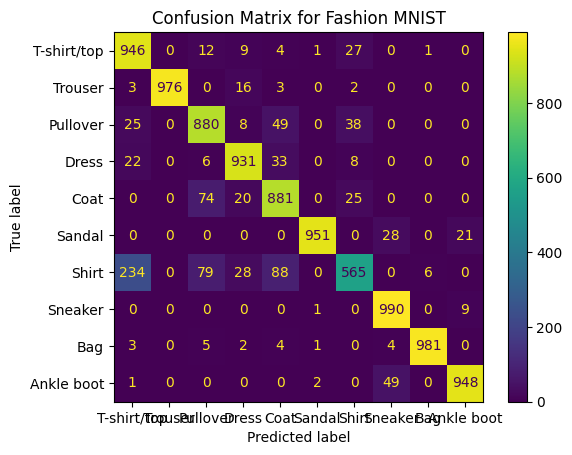

In [4]:
# 4. Provide Plot of Confusion Matrix for the New Selected Dataset
# Train the model
hist = lenet.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
y_predictions = lenet.predict(x_test)
y_predictions = np.argmax(y_predictions, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(conf_matrix, display_labels=classes).plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix for Fashion MNIST')
plt.show()


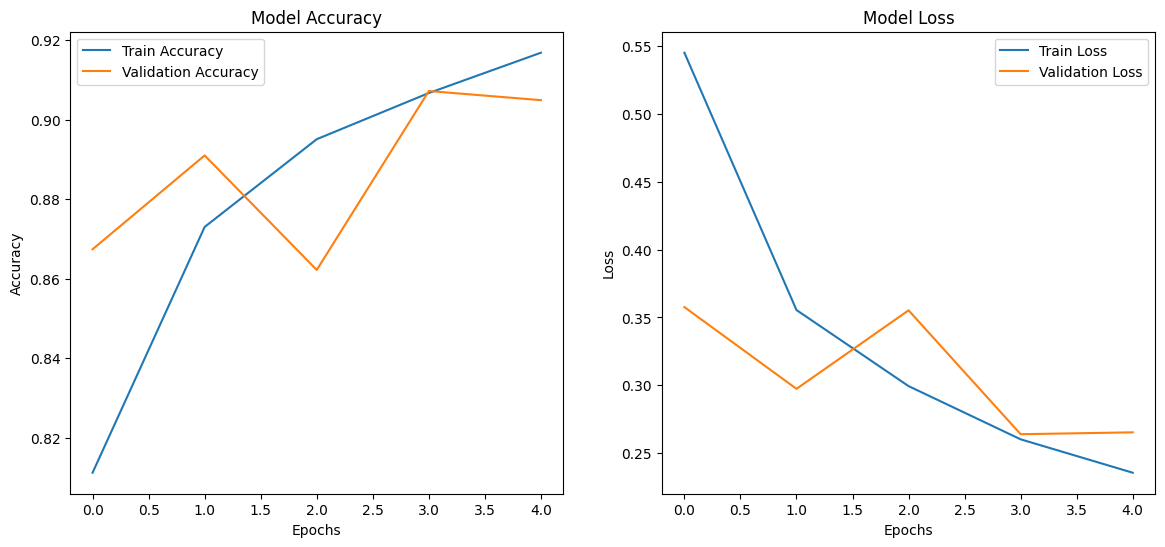

In [5]:
#5. Provide Training and Testing Loss and Accuracy Plots in One Plot Using subplot Command
# Plot training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy
ax1.plot(hist.history['accuracy'], label='Train Accuracy')
ax1.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss
ax2.plot(hist.history['loss'], label='Train Loss')
ax2.plot(hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


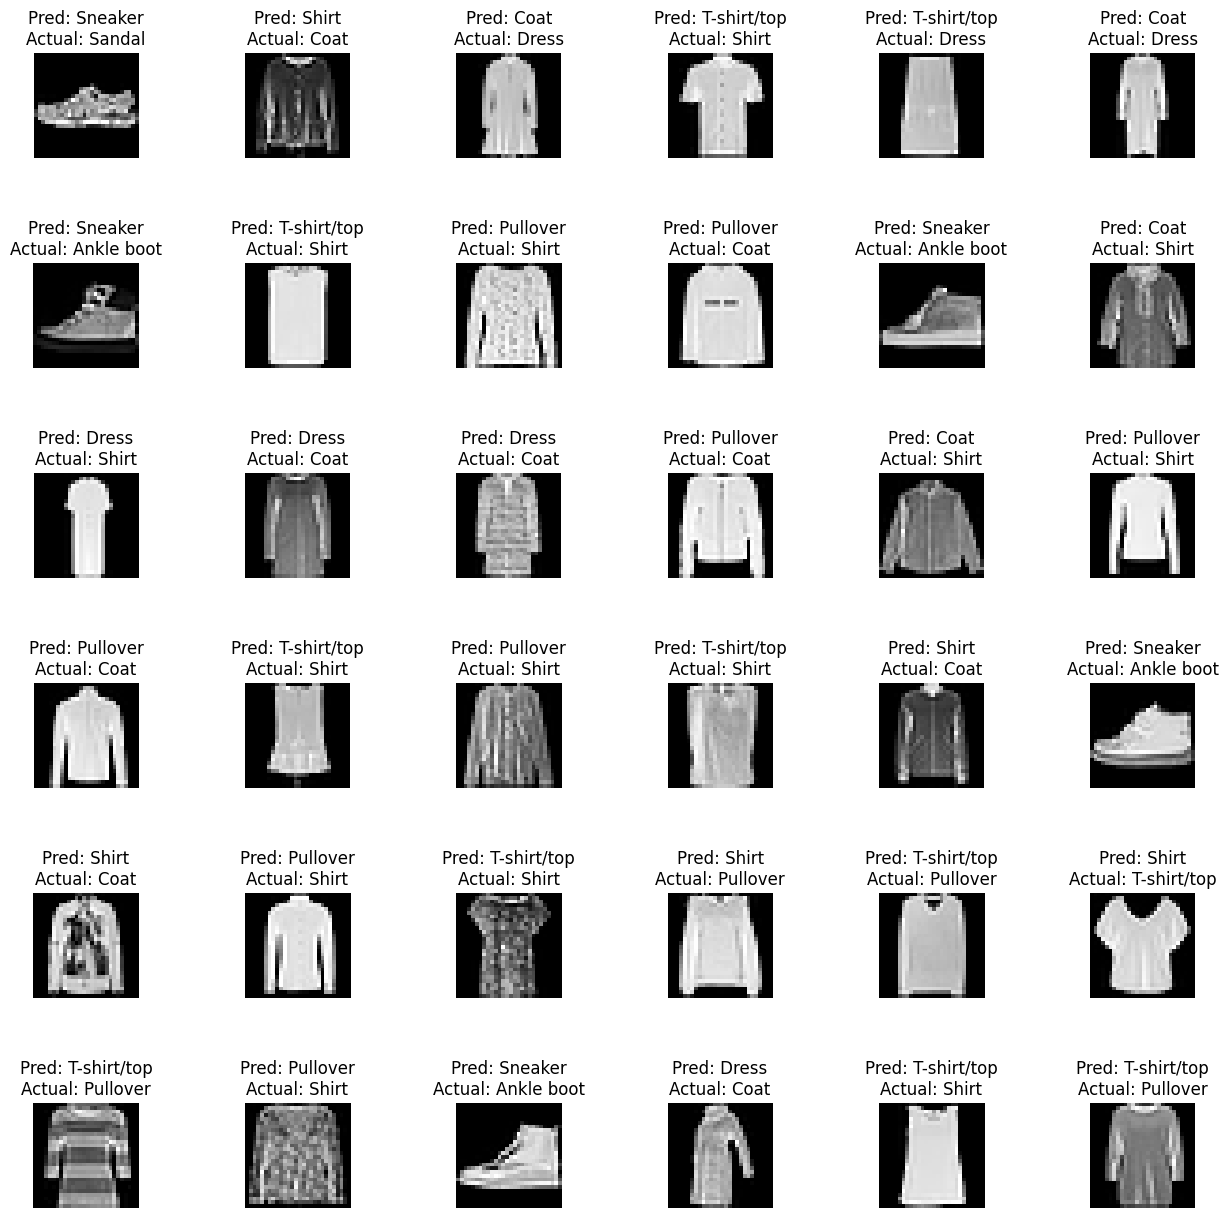

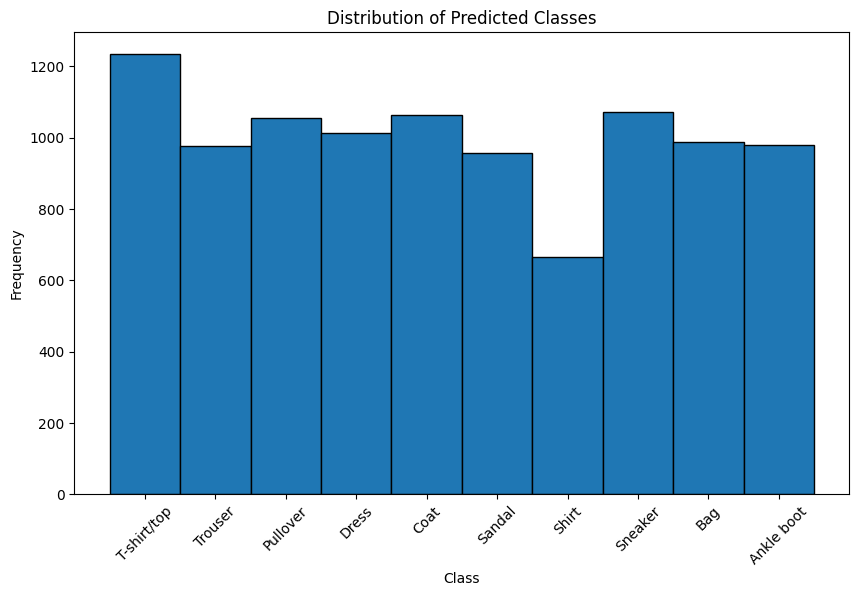

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.95      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.88      0.86      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.85      0.56      0.68      1000
     Sneaker       0.92      0.99      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [6]:
#6. Provide at Least Two More Visualizations Reflecting Your Solution

# Additional visualizations
# Visualization 1: Misclassified images
L, W = 6, 6
fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, L * W):
    idx = np.where(y_predictions != y_test)[0][i]
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {classes[y_predictions[idx]]}\nActual: {classes[y_test[idx]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

# Visualization 2: Distribution of predicted classes
plt.figure(figsize=(10, 6))
plt.hist(y_predictions, bins=np.arange(11)-0.5, edgecolor='black')
plt.xticks(ticks=np.arange(10), labels=classes, rotation=45)
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predictions, target_names=classes))
